### Problems with Decision Tree:
* Overfitting - Due to which testing efficiency increases and reach to max then decreases whereas the training set accuracy just keep on increasing.
* High variance - Change vary quickly with training data.

## Random Forest
* It is a kind of ensembling technique where we take mutiple models and take the average of the result.
* Here we create multiple trees and get the output as the average of outputs of each tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('../Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
columns_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']
df=df.drop(columns_to_drop,axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [4]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Age']=df['Age'].fillna(df['Age'].mean())
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
5,0,3,1,29.699118,0,0,8.4583
6,0,1,1,54.000000,0,0,51.8625
7,0,3,1,2.000000,3,1,21.0750
8,1,3,0,27.000000,0,2,11.1333
9,1,2,0,14.000000,1,0,30.0708


In [5]:
ip_col=['Pclass','Sex','Age','SibSp','Parch','Fare']
op_col=['Survived']
X=df[ip_col].values
y=df[op_col].values
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80)
y_train,y_test=y_train.reshape((-1,)),y_test.reshape((-1,))

In [6]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt=dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8426966292134831
0.8379888268156425


In [7]:
rf=RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=5)
rf=rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.8370786516853933
0.8435754189944135


In [8]:
acc_list=[]
for i in range(1,50):
    rf=RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5)
    acc=cross_val_score(rf,X_test,y_test,cv=5).mean()
    acc_list.append(acc)

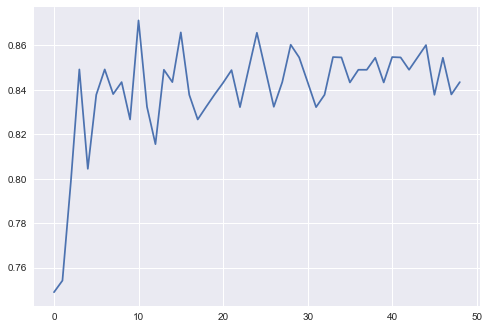

In [9]:
plt.style.use('seaborn')
plt.plot(acc_list)
plt.show()

In [10]:
print(np.argmax(acc_list))

10
